# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Nadia Adyutarahma Putri
- **Email:** nadiaputri2737@gmail.com
- **ID Dicoding:** nadia_adyuta

## Menentukan Pertanyaan Bisnis

- Bagaimana tren penyewaan sepeda harian dan bulanan?
- Kapan waktu sibuk penyewaan sepeda pada hari kerja dibandingkan akhir pekan dan hari libur?
- Apakah kondisi cuaca mempengaruhi jumlah penyewaan sepeda?
- Bagaimana hubungan suhu terhadap jumlah penyewaan sepeda?
- Apakah jumlah penyewaan sepeda lebih tinggi pada musim tertentu?
- Bagaimana distribusi penyewaan sepeda antara pengguna biasa dan penggunaterdaftar?
- Bagaimana tingkat penyewaan sepeda pada jam kerja dibandingkan dengan jam non-kerja?

## Import Semua Packages/Library yang Digunakan

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

## Data Wrangling

### Gathering Data

In [ ]:
# Load data day.csv
day_df = pd.read_csv('day.csv')

# Menampilkan 5 baris pertama
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [ ]:
# Load data hour.csv
hour_df = pd.read_csv('hour.csv')

# Menampilkan 5 baris pertama
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Data Dictionary:**
* `instant`: record index
* `dteday` : date
* `season` : season (1:springer, 2:summer, 3:fall, 4:winter)
* `yr` : year (0: 2011, 1:2012)
* `mnth` : month ( 1 to 12)
* `hr` : hour (0 to 23)
* `holiday` : weather day is holiday or not (extracted from [Web Link])
* `weekday` : day of the week
* `workingday` : if day is neither weekend nor holiday is 1, otherwise is 0.
* `weathersit` :
1: Clear, Few clouds, Partly cloudy, Partly cloudy
2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
* `temp` : Normalized temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-8, t_max=+39 (only in hourly scale)
* `atemp`: Normalized feeling temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-16, t_max=+50 (only in hourly scale)
* `hum`: Normalized humidity. The values are divided to 100 (max)
* `windspeed`: Normalized wind speed. The values are divided to 67 (max)
* `casual`: count of casual users
* `registered`: count of registered users
* `cnt`: count of total rental bikes including both casual and registered

### **Assessing Data**

#### **hour_df**

In [ ]:
# Informasi umum
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [ ]:
# Cek missing value
hour_df.isnull().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [ ]:
# Cek duplikat
hour_df.duplicated().sum()

0

In [ ]:
# Cek outlier
def find_outliers_iqr(data):
  q1 = data.quantile(0.25)
  q3 = data.quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - 1.5 * iqr
  upper_bound = q3 + 1.5 * iqr
  outliers = data[(data < lower_bound) | (data > upper_bound)]
  return outliers

# Pilih kolom numerik
numerical_cols = hour_df[['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']]

# DataFrame untuk menyimpan hasil outlier
outlier_mask = pd.DataFrame(index=hour_df.index)

# Cek jumlah outlier untuk setiap kolom
for col in numerical_cols:
    outliers = find_outliers_iqr(hour_df[col])
    print(f"Jumlah outlier di kolom {col}: {len(outliers)}")

    # Tambahkan kolom ke outlier_mask
    outlier_mask[col] = hour_df[col].isin(outliers)

# Hitung jumlah baris yang memiliki setidaknya satu outlier
rows_with_outliers = outlier_mask.any(axis=1)
num_rows_with_outliers = rows_with_outliers.sum()

print(f"\nJumlah baris yang mengandung outlier: {num_rows_with_outliers}")

# Persentase baris dengan outlier
percentage_rows_with_outliers = (num_rows_with_outliers / len(hour_df)) * 100
print(f"Persentase baris dengan outlier: {percentage_rows_with_outliers:.2f}%")

Jumlah outlier di kolom temp: 0
Jumlah outlier di kolom atemp: 0
Jumlah outlier di kolom hum: 22
Jumlah outlier di kolom windspeed: 342
Jumlah outlier di kolom casual: 1192
Jumlah outlier di kolom registered: 680
Jumlah outlier di kolom cnt: 505

Jumlah baris yang mengandung outlier: 2159
Persentase baris dengan outlier: 12.42%


#### **day_df**

In [ ]:
# Informasi umum
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [ ]:
# Cek duplikat
day_df.duplicated().sum()

0

In [ ]:
# Cek jumlah outlier

numerical_cols = day_df[['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']]

# DataFrame untuk menyimpan hasil outlier
outlier_mask = pd.DataFrame(index=day_df.index)

# Cek jumlah outlier untuk setiap kolom
for col in numerical_cols:
    outliers = find_outliers_iqr(day_df[col])
    print(f"Jumlah outlier di kolom {col}: {len(outliers)}")

    # Tambahkan kolom ke outlier_mask
    outlier_mask[col] = day_df[col].isin(outliers)

# Hitung jumlah baris yang memiliki setidaknya satu outlier
rows_with_outliers = outlier_mask.any(axis=1)
num_rows_with_outliers = rows_with_outliers.sum()

print(f"\nJumlah baris yang mengandung outlier: {num_rows_with_outliers}")

# Persentase baris dengan outlier
percentage_rows_with_outliers = (num_rows_with_outliers / len(day_df)) * 100
print(f"Persentase baris dengan outlier: {percentage_rows_with_outliers:.2f}%")

Jumlah outlier di kolom temp: 0
Jumlah outlier di kolom atemp: 0
Jumlah outlier di kolom hum: 2
Jumlah outlier di kolom windspeed: 13
Jumlah outlier di kolom casual: 44
Jumlah outlier di kolom registered: 0
Jumlah outlier di kolom cnt: 0

Jumlah baris yang mengandung outlier: 58
Persentase baris dengan outlier: 7.93%


**Insight:**
- Data `hour_df` terdiri dari 17 kolom dan 17379 baris. Data `day_df` terdiri dari 16 kolom dan 731 baris.
- Nama kolom kurang jelas
- Ketidaksesuaian tipe data pada kolom `dteday`
- Tidak terdapat *missing value* dan duplikasi data
- Terdapat outlier sebanyak 12.42% dari data `hour_df` dan 7.93% dari data `day_df`. Menghapus outlier bisa mengakibatkan hilangnya informasi penting tentang variabilitas penyewaan sepeda. Jadi, outlier akan diabaikan karena dinilai bisa memberikan wawasan penting, seperti jumlah sewa sepeda yang sangat tinggi atau sangat rendah pada jam tertentu.

### Cleaning Data

In [ ]:
# Hapus kolom yang tidak diperlukan
day_df = day_df.drop(columns=['instant', 'atemp', 'hum', 'windspeed'])
hour_df = hour_df.drop(columns=['instant', 'atemp', 'hum', 'windspeed'])

In [ ]:
# Mengubah nama kolom untuk memperjelas data
hour_df.rename(columns={
    'yr': 'year',
    'dteday': 'date',
    'mnth': 'month',
    'hr': 'hour',
    'weekday': 'day',
    'weathersit': 'weather',
    'cnt': 'count_total',
    'temp': 'temperature',
    'casual': 'casual_users',
    'registered': 'registered_users',
}, inplace=True)

# Menampilkan nama kolom yang sudah diperbarui
hour_df.columns

Index(['date', 'season', 'year', 'month', 'hour', 'holiday', 'day',
       'workingday', 'weather', 'temperature', 'casual_users',
       'registered_users', 'count_total'],
      dtype='object')

In [ ]:
# Mengubah nama kolom untuk memperjelas data
day_df.rename(columns={
    'yr': 'year',
    'dteday': 'date',
    'mnth': 'month',
    'weekday': 'day',
    'weathersit': 'weather',
    'cnt': 'count_total',
    'temp': 'temperature',
    'casual': 'casual_users',
    'registered': 'registered_users',
}, inplace=True)

# Menampilkan nama kolom yang sudah diperbarui
day_df.columns

Index(['date', 'season', 'year', 'month', 'holiday', 'day', 'workingday',
       'weather', 'temperature', 'casual_users', 'registered_users',
       'count_total'],
      dtype='object')

In [ ]:
# Mengubah tipe data pada kolom 'date' menjadi datetime
day_df['date'] = pd.to_datetime(day_df['date'])
hour_df['date'] = pd.to_datetime(hour_df['date'])

In [ ]:
# Mengubah tipe data kategori

# Kolom kategori
columns = ['season', 'month', 'day', 'weather']

# Mengonversi kolom yang relevan menjadi tipe "category"
for column in columns:
    day_df[column] =  day_df[column].astype('category')
    hour_df[column] =  hour_df[column].astype('category')

day_df.info()
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   date              731 non-null    datetime64[ns]
 1   season            731 non-null    category      
 2   year              731 non-null    int64         
 3   month             731 non-null    category      
 4   holiday           731 non-null    int64         
 5   day               731 non-null    category      
 6   workingday        731 non-null    int64         
 7   weather           731 non-null    category      
 8   temperature       731 non-null    float64       
 9   casual_users      731 non-null    int64         
 10  registered_users  731 non-null    int64         
 11  count_total       731 non-null    int64         
dtypes: category(4), datetime64[ns](1), float64(1), int64(6)
memory usage: 49.7 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 

In [ ]:
# Mapping kolom 'year
year_mapping = {
    0: '2011',
    1: '2012'
}

day_df['year'] = day_df['year'].map(year_mapping)
hour_df['year'] = hour_df['year'].map(year_mapping)

In [ ]:
# Mapping kolom 'day'
day_mapping = {
    0: 'Sunday',
    1: 'Monday',
    2: 'Tuesday',
    3: 'Wednesday',
    4: 'Thursday',
    5: 'Friday',
    6: 'Saturday'
}

day_df['day'] = day_df['day'].map(day_mapping)
hour_df['day'] = hour_df['day'].map(day_mapping)

In [ ]:
# Mapping 'month'
month_mapping = {
    1: 'January',
    2: 'February',
    3: 'March',
    4: 'April',
    5: 'May',
    6: 'June',
    7: 'July',
    8: 'August',
    9: 'September',
    10: 'October',
    11: 'November',
    12: 'December'
}

day_df['month'] = day_df['month'].map(month_mapping)
hour_df['month'] = hour_df['month'].map(month_mapping)

In [ ]:
# Mapping 'weather'
weather_mapping = {
    1: 'Clear',
    2: 'Mist',
    3: 'Light Rain/Snow',
    4: 'Heavy Rain/Snow'
}

day_df['weather'] = day_df['weather'].map(weather_mapping)
hour_df['weather'] = hour_df['weather'].map(weather_mapping)

In [ ]:
# Mapping 'season'
season_mapping = {
    1: 'Spring',
    2: 'Summer',
    3: 'Fall',
    4: 'Winter'
}

day_df['season'] = day_df['season'].map(season_mapping)
hour_df['season'] = hour_df['season'].map(season_mapping)

In [ ]:
# Mengubah kolom 'hour' menjadi format 24 jam
hour_df['hour'] = hour_df['hour'].apply(lambda x: '{:02d}:00'.format(x))

# Menampilkan perubahan
hour_df['hour'].head()

,hour
0,00:00
1,01:00
2,02:00
3,03:00
4,04:00


In [ ]:
# Mengembalikan nilai pada kolom 'temp' ke nilai sebenarnya
hour_df['temperature'] = (hour_df['temperature'] * 41).round().astype(int)
day_df['temperature'] = (day_df['temperature'] * 41).round().astype(int)

In [ ]:
# Menampilkan 5 data pertama
day_df.head()

,date,season,year,month,holiday,day,workingday,weather,temperature,casual_users,registered_users,count_total
0,2011-01-01,Spring,2011,January,0,Saturday,0,Mist,14,331,654,985
1,2011-01-02,Spring,2011,January,0,Sunday,0,Mist,15,131,670,801
2,2011-01-03,Spring,2011,January,0,Monday,1,Clear,8,120,1229,1349
3,2011-01-04,Spring,2011,January,0,Tuesday,1,Clear,8,108,1454,1562
4,2011-01-05,Spring,2011,January,0,Wednesday,1,Clear,9,82,1518,1600


**Insight:**

- Diperoleh data dengan kolom yang dibutuhkan untuk analisis
- Melakukan mapping pada beberapa kolom untuk memudahkan analisis
- Mengubah tipe data menjadi sesuai
- Mengubah format jam
- Mengembalikan nilai pada kolom `temperature` ke nilai sebenarnya (bukan hasil normalisasi)

In [38]:
# Menyimpan data hasil cleaning
hour_df.to_csv('hour_cleaned.csv', index=False)
day_df.to_csv('day_cleaned.csv', index=False)

## Exploratory Data Analysis (EDA)

### Explore hour_df

In [ ]:
# Statistika deskriptif

hour_df.describe(include='all')

,date,season,year,month,hour,holiday,day,workingday,weather,temperature,casual_users,registered_users,count_total
count,17379,17379,17379,17379,17379,17379.000000,17379,17379.000000,17379,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,4,2,12,24,NaN,7,NaN,4,NaN,NaN,NaN,NaN
top,NaN,Fall,2012,May,17:00,NaN,Saturday,NaN,Clear,NaN,NaN,NaN,NaN
freq,NaN,4496,8734,1488,730,NaN,2512,NaN,11413,NaN,NaN,NaN,NaN
mean,2012-01-02 04:08:34.552045568,NaN,NaN,NaN,NaN,0.028770,NaN,0.682721,NaN,20.358248,35.676218,153.786869,189.463088
min,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,NaN,1.000000,0.000000,0.000000,1.000000
25%,2011-07-04 00:00:00,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,NaN,14.000000,4.000000,34.000000,40.000000
50%,2012-01-02 00:00:00,NaN,NaN,NaN,NaN,0.000000,NaN,1.000000,NaN,20.000000,17.000000,115.000000,142.000000
75%,2012-07-02 00:00:00,NaN,NaN,NaN,NaN,0.000000,NaN,1.000000,NaN,27.000000,48.000000,220.000000,281.000000
max,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,1.000000,NaN,1.000000,NaN,41.000000,367.000000,886.000000,977.000000


Penyewaan sepeda terbanyak terjadi pada jam 17.00

### Explore df_day

In [ ]:
day_df[day_df['holiday']==1].sample(10)

,date,season,year,month,holiday,day,workingday,weather,temperature,casual_users,registered_users,count_total
366,2012-01-02,Spring,2012,January,1,Monday,0,Clear,11,244,1707,1951
681,2012-11-12,Winter,2012,November,1,Monday,0,Clear,20,1097,5172,6269
314,2011-11-11,Winter,2011,November,1,Friday,0,Clear,13,440,2928,3368
184,2011-07-04,Fall,2011,July,1,Monday,0,Mist,30,3065,2978,6043
359,2011-12-26,Spring,2011,December,1,Monday,0,Clear,13,430,887,1317
327,2011-11-24,Winter,2011,November,1,Thursday,0,Clear,15,560,935,1495
380,2012-01-16,Spring,2012,January,1,Monday,0,Clear,8,217,2081,2298
691,2012-11-22,Winter,2012,November,1,Thursday,0,Clear,14,955,1470,2425
51,2011-02-21,Spring,2011,February,1,Monday,0,Mist,12,195,912,1107
247,2011-09-05,Fall,2011,September,1,Monday,0,Mist,28,1236,2115,3351


Terdapat hari kerja (Senin-Jumat) yang libur. Bisa terjadi salah satunya karena hari libur nasional.

### **Bagaimana tren penyewaan sepeda harian dan bulanan?**

In [45]:
# Menggabungkan bulan dan tahun
day_df['month_year'] = day_df['date'].dt.to_period('M')

# Menghitung tren bulanan
monthly_trend = day_df.groupby('month_year')['count_total'].sum()
monthly_trend

,count_total
month_year,
2011-01,38189
2011-02,48215
2011-03,64045
2011-04,94870
2011-05,135821
2011-06,143512
2011-07,141341
2011-08,136691
2011-09,127418


In [51]:
# Menghitung rata-rata dan total penyewaan sepeda per bulan
monthly_group_trend = day_df.groupby('month')['count_total'].agg(['mean', 'sum']).rename(columns={'sum': 'total'})
monthly_group_trend


<ipython-input-51-03f37db2a73d>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_group_trend = day_df.groupby('month')['count_total'].agg(['mean', 'sum']).rename(columns={'sum': 'total'})


,mean,total
month,,
January,2176.338710,134933
February,2655.298246,151352
March,3692.258065,228920
April,4484.900000,269094
May,5349.774194,331686
June,5772.366667,346342
July,5563.677419,344948
August,5664.419355,351194
September,5766.516667,345991


Jumlah penyewaan sepeda dari bulan ke bulan selama 2011-2012 cenderung fluktuatif

### **Kapan waktu sibuk penyewaan sepeda pada hari kerja dibandingkan akhir pekan dan hari libur?**

In [44]:
# Filter untuk hari kerja (workingday = 1)
workingday_df = hour_df[hour_df['workingday'] == 1]

# Waktu sibuk pada hari kerja
busy_workingday = workingday_df.groupby('hour')['count_total'].sum()
busy_workingday.sort_values(ascending=False)

,count_total
hour,
17:00,262120
18:00,245129
08:00,236595
19:00,173504
16:00,146268
07:00,144144
20:00,124360
09:00,119793
15:00,100263


Pada hari kerja, penyewaan sepeda tertinggi saat jam 17.00

In [43]:
# Filter untuk hari libur (holiday = 1)
holiday_df = hour_df[hour_df['holiday'] == 1]

# Waktu sibuk pada hari libur
busy_holiday = holiday_df.groupby('hour')['count_total'].sum()
busy_holiday.sort_values(ascending=False)

,count_total
hour,
13:00,6269
17:00,6156
12:00,6030
14:00,6012
16:00,5718
18:00,5644
15:00,5568
11:00,5219
19:00,4657


Pada hari libur, penyewaan sepeda tertinggi saat jam 13.00

In [42]:
# Filter untuk akhir pekan
weekend = hour_df[hour_df['day'].isin(['Saturday', 'Sunday'])]

# Menghitung rata-rata penyewaan sepeda per jam pada akhir pekan
busy_times_weekend = weekend.groupby('hour')['count_total'].sum()
busy_times_weekend.sort_values(ascending=False)

,count_total
hour,
13:00,79832
12:00,78576
14:00,78221
15:00,77318
16:00,75762
17:00,68584
11:00,67619
18:00,58999
10:00,54842


Pada akhir pekan, penyewaan sepeda tertinggi saat jam 13.00

### **Apakah kondisi cuaca mempengaruhi jumlah penyewaan sepeda?**

In [46]:
# Menghitung jumlah penyewaan sepeda berdasarkan kondisi cuaca
weather_effect = hour_df.groupby('weather')['count_total'].sum()
weather_effect

<ipython-input-46-a4b4f5a24860>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  weather_effect = hour_df.groupby('weather')['count_total'].sum()


,count_total
weather,
Clear,2338173
Mist,795952
Light Rain/Snow,158331
Heavy Rain/Snow,223


### **Bagaimana hubungan suhu dengan jumlah penyewaan sepeda?**

In [54]:
# Menghitung korelasi antara suhu dan jumlah penyewaan sepeda

# Menghitung korelasi antara suhu dan jumlah penyewaan sepeda pada data per jam
hourly_correlation = hour_df['temperature'].corr(hour_df['count_total'])
print(f'Hourly correlation between temperature and bike rentals: {hourly_correlation}')

# Menghitung korelasi antara suhu dan jumlah penyewaan sepeda pada data per hari
daily_correlation = day_df['temperature'].corr(day_df['count_total'])
print(f'Daily correlation between temperature and bike rentals: {daily_correlation}')


Hourly correlation between temperature and bike rentals: 0.4045027693376205
Daily correlation between temperature and bike rentals: 0.6274660738524757


Pada data per jam, suhu dan jumlah penyewaan sepeda menunjukkan hubungan positif yang lemah sementara pada data harian, keduanya menunjukkan hubungan positif yang kuat. Hal tersebut bisa terjadi karena pada data per jam, fluktuasi suhu dan jumlah penyewaan sepeda sangat bervariasi.

### **Apakah jumlah penyewaan sepeda lebih tinggi pada musim tertentu?**

In [57]:
# Menghitung penyewaan sepeda berdasarkan musim
season_trend = day_df.groupby('season')['count_total'].sum()
season_trend.sort_values(ascending=False)

<ipython-input-57-aab997d13e5a>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  season_trend = day_df.groupby('season')['count_total'].sum()


,count_total
season,
Fall,1061129
Summer,918589
Winter,841613
Spring,471348


Jumlah penyewaan sepeda cenderung lebih tinggi pada musim gugur dibandingkan musim lainnya.

### **Bagaimana distribusi penyewaan sepeda antara pengguna biasa dan pengguna terdaftar?**

In [58]:
# Menghitung total penyewaan sepeda oleh pengguna biasa dan terdaftar
user_type_distribution = day_df[['casual_users', 'registered_users']].sum()
user_type_distribution

,0
casual_users,620017
registered_users,2672662


Pengguna terdaftar lebih banyak menyewa sepeda daripada pengguna biasa.

### **Bagaimana tingkat penyewaan sepeda pada jam kerja dan jam non-kerja**

Asumsi jam kerja = 07.00 - 17.00

In [63]:
# Menghitung jumlah penyewaan sepeda pada jam kerja (07:00 - 17:00)
work_hours_rental = hour_df[(hour_df['hour'] >= '07') & (hour_df['hour'] <= '17')]['count_total'].sum()

# Menghitung jumlah penyewaan sepeda pada jam non-kerja (di luar 07:00 - 17:00)
non_work_hours_rental = hour_df[(hour_df['hour'] < '07') | (hour_df['hour'] > '17')]['count_total'].sum()

print(f'Total bike rentals during work hours (07:00-17:00): {work_hours_rental}')
print(f'Total bike rentals during non-work hours: {non_work_hours_rental}')


Total bike rentals during work hours (07:00-17:00): 1808069
Total bike rentals during non-work hours: 1484610


Jumlah penyewaan sepeda lebih banyak terjadi selama jam kerja.

## Visualization & Explanatory Analysis

### Bagaimana tren penyewaan sepeda harian dan bulanan?

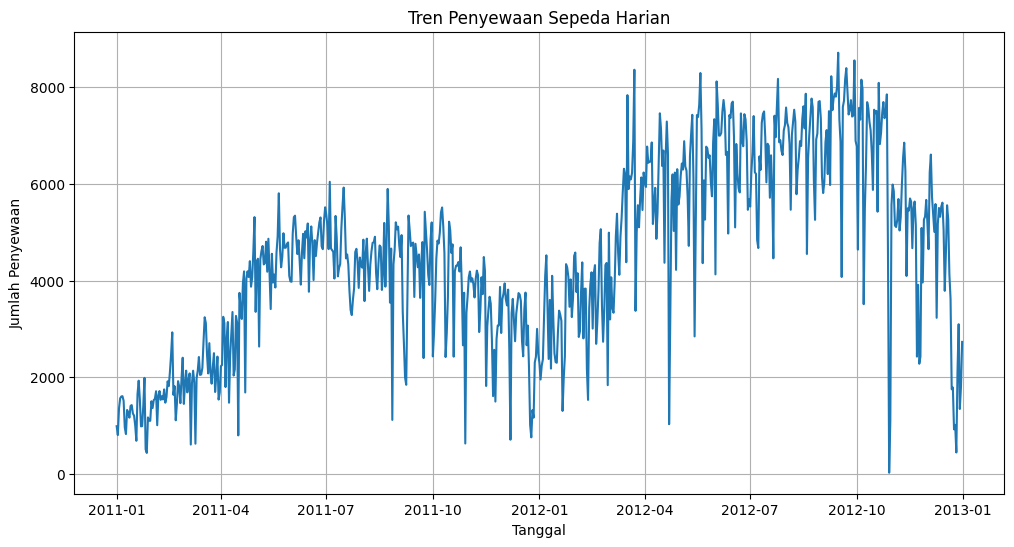

In [64]:
# Visualisasi tren penyewaan sepeda harian
plt.figure(figsize=(12, 6))
plt.plot(day_df['date'], day_df['count_total'])
plt.title('Tren Penyewaan Sepeda Harian')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Penyewaan')
plt.grid(True)
plt.show()


In [69]:
# Tren penyewaan sepeda harian

fig = px.line(day_df, x='date', y='count_total', title='Tren Penyewaan Sepeda Harian')
fig.update_layout(xaxis_title='Tanggal', yaxis_title='Jumlah Penyewaan')
fig.show()

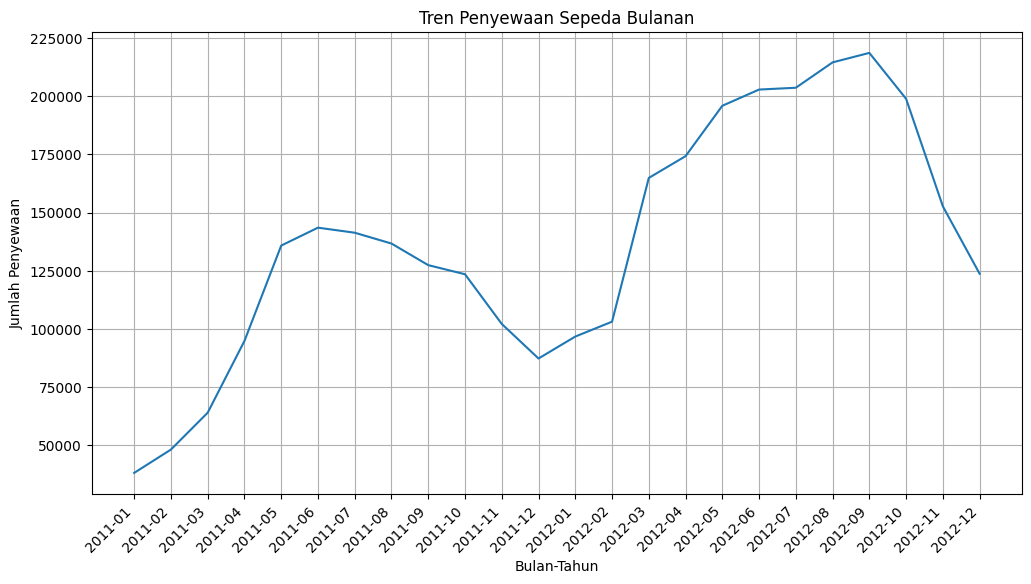

In [67]:
# Visualisasi tren penyewaan sepeda bulanan
plt.figure(figsize=(12, 6))
plt.plot(monthly_trend.index.astype(str), monthly_trend.values)
plt.title('Tren Penyewaan Sepeda Bulanan')
plt.xlabel('Bulan-Tahun')
plt.ylabel('Jumlah Penyewaan')
plt.grid(True)
plt.xticks(rotation=45, ha='right')  # Rotasi label sumbu x agar mudah dibaca
plt.show()


In [77]:
fig = px.line(monthly_trend, x=monthly_trend.index.astype(str), y=monthly_trend.values, title='Tren Penyewaan Sepeda Bulanan')
fig.update_layout(xaxis_title='Waktu', yaxis_title='Jumlah Penyewaan')
fig.show()


Tren penyewaan sepeda baik harian maupun bulanan sama-sama menunjukkan adanya pola musiman di mana selama beberapa waktu tertentu tren nya naik kemudian turun dan seterusnya.

### Kapan waktu sibuk (peak hour) penyewaan sepeda pada hari kerja, akhir pekan, dan hari libur

In [74]:
# Visualisasi peak hour penyewaan sepeda pada hari kerja
fig_workingday = px.line(workingday_df.groupby('hour')['count_total'].sum(),
                         title='Peak Hour Penyewaan Sepeda pada Hari Kerja',
                         labels={'value': 'Jumlah Penyewaan', 'hour': 'Jam'})
fig_workingday.update_layout(showlegend=False)
fig_workingday.show()

# Visualisasi peak hour penyewaan sepeda pada hari libur
fig_holiday = px.line(holiday_df.groupby('hour')['count_total'].sum(),
                      title='Peak Hour Penyewaan Sepeda pada Hari Libur',
                      labels={'value': 'Jumlah Penyewaan', 'hour': 'Jam'})
fig_holiday.update_layout(showlegend=False)
fig_holiday.show()

# Visualisasi peak hour penyewaan sepeda pada akhir pekan
fig_weekend = px.line(weekend.groupby('hour')['count_total'].sum(),
                      title='Peak Hour Penyewaan Sepeda pada Akhir Pekan',
                      labels={'value': 'Jumlah Penyewaan', 'hour': 'Jam'})
fig_weekend.update_layout(showlegend=False)
fig_weekend.show()

In [75]:
# Visualisasi peak hour penyewaan sepeda pada hari kerja, akhir pekan, dan hari libur dalam satu plot
fig = go.Figure()

fig.add_trace(go.Scatter(x=busy_workingday.index, y=busy_workingday.values,
                    mode='lines',
                    name='Hari Kerja'))

fig.add_trace(go.Scatter(x=busy_times_weekend.index, y=busy_times_weekend.values,
                    mode='lines',
                    name='Akhir Pekan'))

fig.add_trace(go.Scatter(x=busy_holiday.index, y=busy_holiday.values,
                    mode='lines',
                    name='Hari Libur'))

fig.update_layout(title='Perbandingan Peak Hour Penyewaan Sepeda',
                  xaxis_title='Jam',
                  yaxis_title='Jumlah Penyewaan')

fig.show()


**Insight:**
- Jumlah penyewaan sepeda tertinggi pada hari kerja terjadi pada jam 17:00 sedangkan pada hari libur dan akhir pekan pada jam 13:00.
- Orang lebih banyak menyewa sepeda pada hari kerja dibandingkan pada hari libur maupun akhir pekan.

### Apakah kondisi cuaca mempengaruhi jumlah penyewaan sepeda?

In [82]:
# Visualisasi jumlah penyewaan sepeda berdasarkan cuaca

fig_weather = px.bar(weather_effect, x=weather_effect.index, y=weather_effect.values,
                     title='Pengaruh Kondisi Cuaca terhadap Jumlah Penyewaan Sepeda',
                     labels={'weather': 'Kondisi Cuaca', 'y': 'Jumlah Penyewaan'})

# Menambahkan teks nilai
fig_weather.update_traces(text=weather_effect.values, textposition='outside')

fig_weather.show()


Kondisi cuaca jelas mempengaruhi jumlah penyewaan sepeda. Mayoritas orang menyewa sepeda pada cuaca cerah dan hanya sedikit yang menyewa sepeda saat hujan lebat. Salah satu alasannya adalah keamanan. Bersepeda saat cuaca ekstrim seperti hujan lebat bisa berbahaya karena penglihatan berkurang dan kondisi jalan licin/tergenang air.

### Bagaimana hubungan suhu dengan jumlah penyewaan sepeda?

In [84]:
# Visualisasi hubungan suhu dengan jumlah penyewaan sepeda

# Plot hubungan suhu dengan jumlah penyewaan sepeda dari hour_df
fig_hour = px.scatter(hour_df, x='temperature', y='count_total',
                     title='Hubungan Suhu dengan Jumlah Penyewaan Sepeda (Data Per Jam)',
                     labels={'temperature': 'Suhu (°C)', 'count_total': 'Jumlah Penyewaan'})
fig_hour.show()

# Plot hubungan suhu dengan jumlah penyewaan sepeda dari day_df
fig_day = px.scatter(day_df, x='temperature', y='count_total',
                     title='Hubungan Suhu dengan Jumlah Penyewaan Sepeda (Data Per Hari)',
                     labels={'temperature': 'Suhu (°C)', 'count_total': 'Jumlah Penyewaan'})
fig_day.show()


Terdapat hubungan yang positif antara suhu dan jumlah penyewaan sepeda

### Apakah jumlah penyewaan sepeda lebih tinggi pada musim tertentu?

In [90]:
# Visualisasi jumlah penyewaan sepeda berdasarkan musim

fig_season = px.bar(season_trend, x=season_trend.index, y=season_trend.values,
                     title='Jumlah Penyewaan Sepeda Berdasarkan Musim',
                     labels={'season': 'Musim', 'y': 'Jumlah Penyewaan'})

# Menambahkan teks nilai
fig_season.update_traces(text=season_trend.values, textposition='outside')

fig_season.show()


Jumlah penyewaan sepeda cenderung lebih tinggi pada musim gugur (fall) dibandingkan dengan musim lainnya. Hal ini bisa dimanfaatkan jasa penyewa untuk lebih memprioritaskan menyewakan sepeda pada musim gugur.

### Bagaimana distribusi penyewaan sepeda antara pengguna biasa dan pengguna terdaftar

In [103]:
# Visualisasi distribusi penyewaan sepeda antara pengguna biasa dan pengguna terdaftar

user_type_distribution.index = user_type_distribution.index.map({
    'casual_users': 'Pengguna Biasa',
    'registered_users': 'Pengguna Terdaftar'
})

fig_user_type = px.bar(user_type_distribution, x=user_type_distribution.index, y=user_type_distribution.values,
                     title='Distribusi Penyewaan Sepeda Berdasarkan Jenis Pengguna',
                     labels={'x': 'Jenis Pengguna', 'index': 'Tipe Pengguna', 'y': 'Jumlah Penyewaan'})

# Menambahkan teks nilai pada batang
fig_user_type.update_traces(text=user_type_distribution.values, textposition='outside')

# Menampilkan grafik
fig_user_type.show()


In [110]:
# Data distribusi pengguna
labels = ['Pengguna Biasa', 'Pengguna Terdaftar']
values = [user_type_distribution['Pengguna Biasa'], user_type_distribution['Pengguna Terdaftar']]

# Membuat donut chart
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3, textinfo='label+percent', textposition='outside')])

# Judul dan pengaturan
fig.update_layout(title_text="Distribusi Penyewaan Sepeda Berdasarkan Jenis Pengguna", showlegend=False)

# Menampilkan chart
fig.show()


Mayoritas penyewa sepeda merupakan pengguna yang terdaftar. Kemungkinan mendapatkan promo jika menjadi member sehingga sering menyewa sepeda.

### Bagaimana tingkat penyewaan sepeda pada jam kerja dan jam non-kerja

In [111]:
# Data untuk donut chart
labels = ['Jam Kerja', 'Jam Non-Kerja']
values = [work_hours_rental, non_work_hours_rental]

# Membuat donut chart
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3, textinfo='label+percent', textposition='outside')])

# Judul dan pengaturan
fig.update_layout(title_text="Tingkat Penyewaan Sepeda pada Jam Kerja dan Non-Kerja", showlegend=False)

# Menampilkan chart
fig.show()


Tingkat penyewaan sepeda lebih tinggi selama jam kerja daripada di luar jam kerja. Namun, perbedaannya tidak terlalu besar.

## Conclusion

- Tren penyewaan sepeda harian dan bulanan cenderung fluktuatif dan menunjukkan adanya pola musiman.
- Jam sibuk (peak hour) penyewaan sepeda pada hari kerja adalah jam 17:00 sedangkan pada hari libur dan akhir pekan jam 13:00.
- Kondisi cuaca jelas mempengaruhi jumlah penyewaan sepeda. Mayoritas orang akan menyewa sepeda pada cuaca yang bagus/cerah.
- Terdapat hubungan positif antara suhu dengan jumlah penyewaan sepeda. Pada data per jam, hubungannya cenderung lemah karena fluktuasi data yang lebih bervariasi daripada pada data harian.
- Jumlah penyewaan sepeda lebih tinggi pada saat musim gugur.
- Lebih banyak pengguna terdaftar yang menyewa sepeda dibandingkan pengguna biasa.
- Tingkat penyewaan sepeda lebih tinggi saat jam kerja daripada di luar jam kerja.